# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [222]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "/home/charlie/CarND/term1/traffic-signs-data/train.p"
validation_file = "/home/charlie/CarND/term1/traffic-signs-data/valid.p"
testing_file = "/home/charlie/CarND/term1/traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [223]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = np.size(X_train, axis=0)

# TODO: Number of validation examples
n_validation = np.size(X_valid, axis=0)

# TODO: Number of testing examples.
n_test = np.size(X_test, axis=0)

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train[0])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.size(np.unique(y_train))


# Load sign label strings
with open('signnames.csv', 'r') as f:
    reader = csv.reader(f)
    listNames = list(reader)
signNames = {int(x[0]):x[1] for x in listNames[1:]}



print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

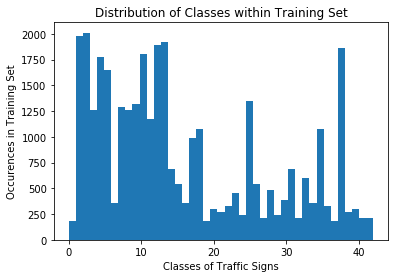

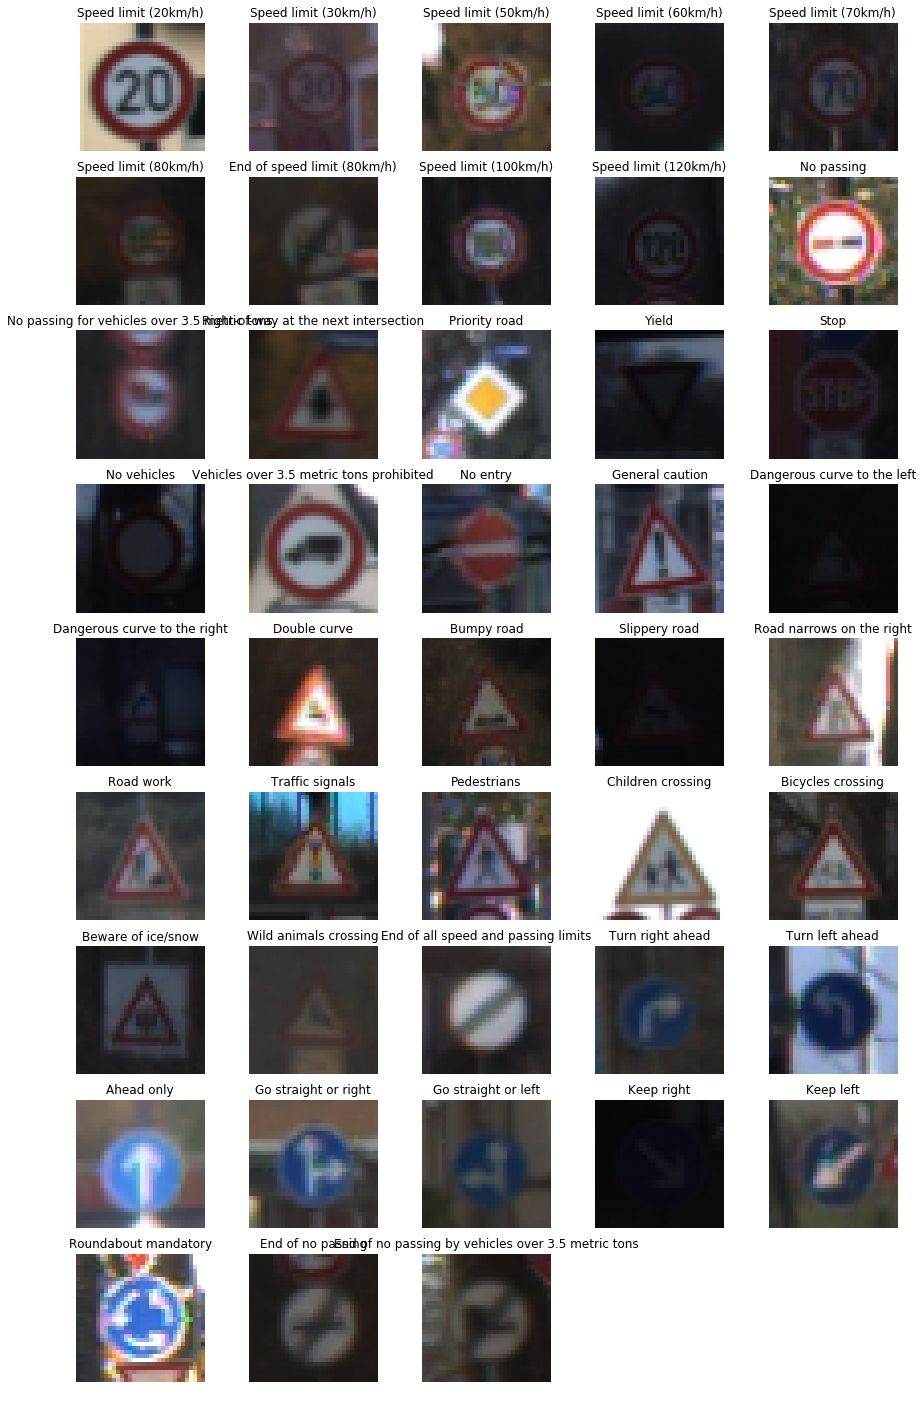

In [228]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline


# Plot histogram of training data labels
fig = plt.figure()
nHist = plt.hist(y_train,n_classes);
plt.xlabel('Classes of Traffic Signs');
plt.ylabel('Occurences in Training Set');
plt.title('Distribution of Classes within Training Set');
display(fig)
plt.close()


def showImage(imageSet, imageIdx, imageTitle=''):
    # Plots a single image from a set of examples
    fig = plt.figure()
    plt.imshow(imageSet[imageIdx])
    plt.title(imageTitle)
    display(fig)
    plt.close()
    

# Display examples of each class
uniqueClassList, uniqueIndices = np.unique(y_train, return_index=True)
fig = plt.figure(figsize=(15,25))
for iClass in range(n_classes):
    ax = plt.subplot(9,5, iClass+1)
    # Display image of iClass
    classID = uniqueClassList[iClass]
    plt.imshow(X_train[uniqueIndices[iClass]])
    ax.axis('off')
    plt.title(signNames[classID])
display(fig)
plt.close()
    

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [121]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from matplotlib.colors import rgb_to_hsv, hsv_to_rgb



def preprocessImages(imageSet):
    
    # Grayscale
    #red = imageSet[:,:,:,0:1]
    #green = imageSet[:,:,:,1:2]
    #blue = imageSet[:,:,:,2:3]
    #grayscaleImageSet = (red + green + blue)/3
    
    imageSet = imageSet/255
    #HSVimageSet = rgb_to_hsv(imageSet)
    
    
    return 2*imageSet - 1


X_train = preprocessImages(X_train)
X_valid = preprocessImages(X_valid)
X_test = preprocessImages(X_test)
    
print(np.shape(X_train))
print(np.shape(X_valid))
print(np.shape(X_test))
print('Preprocessing Complete')

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)
Preprocessing Complete


### Model Architecture

In [103]:
### Define your architecture here.
### Feel free to use as many code cells as needed.


### Define functions for creating TensorFlow layers
import tensorflow as tf


def filteredShape(inputShape, patchShape, strides, padding):
    # Determine size of output after going through filter
    
    if padding == 'VALID':
        out_height = np.ceil(float(inputShape[0] - patchShape[0] + 1) / float(strides[1]))
        out_width  = np.ceil(float(inputShape[1] - patchShape[1] + 1) / float(strides[2]))
        
        filteredOutputShape = [int(out_height), int(out_width)]
        
    elif padding == 'SAME':
        out_height = np.ceil(float(inputShape[0]) / float(strides[1]))
        out_width  = np.ceil(float(inputShape[1]) / float(strides[2]))
        
        filteredOutputShape = [int(out_height), int(out_width)]
        
    return filteredOutputShape


def tfFlatten(x, inputShape):
    # Returns a flattened tensor and its new shape
    output = tf.contrib.layers.flatten(x)
    
    # Determine length of flattened tensor
    length = 1
    for dimLength in inputShape:
        length *= dimLength
    outputShape = [length]
    
    # Debug statement
    print('Input = ',inputShape,'\t-> Flatten Layer \t-> Output = ',outputShape)
    
    return output, outputShape


def tfRelu(x, inputShape):
    # Creates a TensorFlow relu activation layer
    # Parameters:
    # x (input)         [n-D tensor]
    # input (x) shape   [1x(n-1) array]
    #
    # Returns output of relu activation function and shape of output
    
    #Create relu activation layer
    output = tf.nn.relu(x)
    outputShape = inputShape
    
    # Debug statement
    spacing = '\t' if np.size(inputShape) < 3 and inputShape[0]<1000 else ''
    print('Input = ',inputShape,spacing,'\t-> ReLU Layer \t\t-> Output = ',outputShape)
    
    return output, outputShape


def tfSigmoid(x, inputShape):
    # Creates a TensorFlow sigmoid activation layer
    # Parameters:
    # x (input)         [n-D tensor]
    # input (x) shape   [1x(n-1) array]
    #
    # Returns output of sigmoid activation function and shape of output
    
    #Create relu activation layer
    output = tf.sigmoid(x)
    outputShape = inputShape
    
    # Debug statement
    spacing = '\t' if np.size(inputShape) < 3 and inputShape[0]<1000 else ''
    print('Input = ',inputShape,spacing,'\t-> Sigmoid Layer \t-> Output = ',outputShape)
    
    return output, outputShape


def tfDropout(x, inputShape, keep_prob):
    # Creates a TensorFlow dropout layer
    # Parameters:
    # x (input)         [n-D tensor]
    # input (x) shape   [1x(n-1) array]
    #
    # Returns output of dropout function and shape of output
    
    #Create dropout layer
    output = tf.nn.dropout(x, keep_prob)
    outputShape = inputShape
    
    # Debug statement
    spacing = '\t' if np.size(inputShape) < 3 and inputShape[0]<1000 else ''
    print('Input = ',inputShape,spacing,'\t-> Dropout Layer \t-> Output = ',outputShape)
    
    return output, outputShape


def tfConvolution(x, inputShape, patchShape, numNeurons, strides, padding='VALID', mu=0, sigma=1):
    # Creates a TensorFlow convolution layer
    # Parameters:
    # x (input)         [4D tensor]
    # input (x) shape   [1x3 array]  Image Height,Width,Depth
    # patch shape       [1x2 array]
    # numNeurons        [int]
    # strides array     [1x4 array]
    # padding type      {'VALID','SAME'}
    # mu/sigma for weights/bias initialization   [float]
    #
    # Returns output of convolution layer and shape of output
    
    # Assert that input has 3 dimensions
    assert np.size(inputShape) == 3
    
    # Determine tensor shapes
    wShape = patchShape + [inputShape[2]] + [numNeurons]   # [patchWidth,patchHeight,inputDepth,outputDepth]
    bShape = [numNeurons]                                  # [outputDepth]
    
    # Initialize weights and bias variables
    weights = tf.Variable(tf.truncated_normal(wShape,mu,sigma))
    bias = tf.Variable(tf.truncated_normal(bShape,mu,sigma))
    
    # Create convolution layer (conv2d)
    output = tf.nn.bias_add( tf.nn.conv2d(x,weights,strides,padding), bias)
    
    # Determine size of output
    outputShape = filteredShape(inputShape, patchShape, strides, padding) + [numNeurons]
    
    # Debug statement
    print('Input = ',inputShape,'\t-> Convolution Layer \t-> Output = ',outputShape)
    
    return output, outputShape


def tfMaxPool(x, inputShape, patchShape, strides, padding='VALID'):
    # Creates a TensorFlow max pooling layer
    # Parameters:
    # x (input)         [4D tensor]
    # input (x) shape   [1x3 array]  Image Height,Width,Depth
    # patch shape       [1x2 array]
    # strides array     [1x4 array]
    # padding type      {'VALID','SAME'}
    #
    # Returns output of max pooling function and shape of output
    
    # Assert that input has 3 dimensions
    assert np.size(inputShape) == 3
    
    # Function defaults to a window size of 1 for batch and depth
    ksize = [1, patchShape[0], patchShape[1], 1]
    
    # Create max pooling layer
    output = tf.nn.max_pool(x, ksize, strides, padding)
    
    # Determine size of output
    outputShape = filteredShape(inputShape, patchShape, strides, padding) + [inputShape[-1]]
    
    # Debug statement
    print('Input = ',inputShape,'\t-> Max Pooling Layer \t-> Output = ',outputShape)
    
    return output, outputShape


def tfFullyConnect(x, inputShape, numNeurons, mu=0, sigma=1):
    # Creates a TensorFlow linear regression layer
    # Parameters:
    # x (input)         [1D tensor]
    # input (x) shape   [1x1 array]
    # numNeurons        [int]
    # mu/sigma for weights/bias initialization   [float]
    #
    # Returns output of linear regression and shape of output
    
    # Assert that input has 1 dimension
    assert np.size(inputShape) == 1
    
    # Determine tensor shapes
    wShape = [inputShape[0], numNeurons]   # [input, output]
    bShape = [numNeurons]                  # [output]
    
    # Initialize weights and bias variables
    weights = tf.Variable(tf.truncated_normal(wShape,mu,sigma))
    bias = tf.Variable(tf.truncated_normal(bShape,mu,sigma))
    
    # Create linear regression layer
    output = tf.add( tf.matmul(x,weights), bias)
    
    # Determine output shape
    outputShape = [numNeurons]
    
    # Debug statement
    spacing = '\t' if np.size(inputShape) < 3 and inputShape[0]<1000 else ''
    print('Input = ',inputShape,spacing,'\t-> Fully Connect Layer \t-> Output = ',outputShape)
    
    return output, outputShape


print('TF Functions Generated')    

TF Functions Generated


In [140]:
### Define CNN architecture

def CNN(x, dropout_keep_prob):
    #Debug statement
    print('Defining CNN...')
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Define input properties for first layer
    inputShape = [32,32,3]
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    patchShape = [4,4]
    numNeurons = 18
    strides = [1, 1, 1, 1]
    padding = 'VALID'
    output, outputShape = tfConvolution(x, inputShape, patchShape, numNeurons, \
                                        strides, padding, mu, sigma)

    # Activation.
    Layer1_output, outputShape = tfRelu(output, outputShape)
    
    

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    patchShape = [2,2]
    strides = [1, 2, 2, 1]
    padding = 'VALID'
    output, outputShape = tfMaxPool(Layer1_output, outputShape, patchShape, strides, padding)  
    
    
    
    # Layer 2: Convolutional. Output = 10x10x16.
    patchShape = [4,4]
    numNeurons = 32
    strides = [1, 1, 1, 1]
    padding = 'VALID'
    output, outputShape = tfConvolution(output, outputShape, patchShape, numNeurons, \
                                        strides, padding, mu, sigma)

    # Activation.
    Layer2_output, outputShape = tfRelu(output, outputShape)
    
    
    #Store flattened Layer1 Output
    #layer1output, layer1outputShape = tfFlatten(output, outputShape)
    
    
    # Layer 3: Convolutional. Output = 10x10x16.
    patchShape = [4,4]
    numNeurons = 64
    strides = [1, 1, 1, 1]
    padding = 'VALID'
    output, outputShape = tfConvolution(Layer2_output, outputShape, patchShape, numNeurons, \
                                        strides, padding, mu, sigma)


    # Pooling. Input = 10x10x16. Output = 5x5x16.
    patchShape = [2,2]
    strides = [1, 2, 2, 1]
    padding = 'VALID'
    output, outputShape = tfMaxPool(output, outputShape, patchShape, strides, padding)

    
    # Activation.
    Layer3_output, outputShape = tfRelu(output, outputShape)
        
    
    # Flatten. 
    output, outputShape = tfFlatten(Layer3_output, outputShape)
    
        
    
    # Layer 4: Fully Connected. Output = 500.
    numNeurons = 500
    output, outputShape = tfFullyConnect(output, outputShape, numNeurons, mu, sigma)
    
    # Activation.
    output, outputShape = tfRelu(output, outputShape)

    # Layer 5: Fully Connected. Output = 172.
    numNeurons = 172
    output, outputShape = tfFullyConnect(output, outputShape, numNeurons, mu, sigma)
    
    # Activation.
    output, outputShape = tfRelu(output, outputShape)
    
    
    
    # Layer 6: Fully Connected. Output = 86.
    numNeurons = 86
    output, outputShape = tfFullyConnect(output, outputShape, numNeurons, mu, sigma)
    
    # Activation.
    output, outputShape = tfRelu(output, outputShape)
    
    # Dropout
    # dropout_keep_prob defined outside of function
    output, outputShape = tfDropout(output, outputShape, dropout_keep_prob)

    # Layer 7: Fully Connected. Input = 84. Output = 43.
    numNeurons = 43
    output, outputShape = tfFullyConnect(output, outputShape, numNeurons, mu, sigma)
    
    # Final output represents the final logits of the CNN
    logits = output
    
    return logits, Layer1_output, Layer2_output, Layer3_output

print('CNN Generated')

CNN Generated


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [141]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.


# TensorFlow Hyperparamaters

EPOCHS = 8
BATCH_SIZE = 128

# Create TensorFlow placeholders for batch of input images and output labels

# Hardcoded according to results of image_shape and n_classes from data loading cell
#  image_shape = [32,32,3]   n_classes = 43
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# Dropout keep probability
dropout_keep_prob = tf.placeholder(tf.float32)



# Training Pipeline

learnRate = 0.0012

logits, Layer1_output, Layer2_output, Layer3_output = CNN(x, dropout_keep_prob)
probabilities = tf.nn.softmax(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learnRate)
training_operation = optimizer.minimize(loss_operation)


# Model Evaluation

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, dropout_keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


print('Pipeline Generated')

Defining CNN...
Input =  [32, 32, 3] 	-> Convolution Layer 	-> Output =  [29, 29, 18]
Input =  [29, 29, 18]  	-> ReLU Layer 		-> Output =  [29, 29, 18]
Input =  [29, 29, 18] 	-> Max Pooling Layer 	-> Output =  [14, 14, 18]
Input =  [14, 14, 18] 	-> Convolution Layer 	-> Output =  [11, 11, 32]
Input =  [11, 11, 32]  	-> ReLU Layer 		-> Output =  [11, 11, 32]
Input =  [11, 11, 32] 	-> Convolution Layer 	-> Output =  [8, 8, 64]
Input =  [8, 8, 64] 	-> Max Pooling Layer 	-> Output =  [4, 4, 64]
Input =  [4, 4, 64]  	-> ReLU Layer 		-> Output =  [4, 4, 64]
Input =  [4, 4, 64] 	-> Flatten Layer 	-> Output =  [1024]
Input =  [1024]  	-> Fully Connect Layer 	-> Output =  [500]
Input =  [500] 	 	-> ReLU Layer 		-> Output =  [500]
Input =  [500] 	 	-> Fully Connect Layer 	-> Output =  [172]
Input =  [172] 	 	-> ReLU Layer 		-> Output =  [172]
Input =  [172] 	 	-> Fully Connect Layer 	-> Output =  [86]
Input =  [86] 	 	-> ReLU Layer 		-> Output =  [86]
Input =  [86] 	 	-> Dropout Layer 	-> Output

In [142]:

# NEXT STEPS:
#  Regularization: Use dropout or L2 regularization
#  Modify hyperparameters
#  Modify LeNet layers
#  Preprocess data, normalization
#  Augment training data by rotating or shifting colors



### Train Model

from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dropout_keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './trafficSignCNN')
    print("Model saved")


Training...

EPOCH 1 ...
Validation Accuracy = 0.913

EPOCH 2 ...
Validation Accuracy = 0.948

EPOCH 3 ...
Validation Accuracy = 0.958

EPOCH 4 ...
Validation Accuracy = 0.966

EPOCH 5 ...
Validation Accuracy = 0.960

EPOCH 6 ...
Validation Accuracy = 0.966

EPOCH 7 ...
Validation Accuracy = 0.961

EPOCH 8 ...
Validation Accuracy = 0.972

Model saved


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [192]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

from matplotlib.pyplot import imread
import csv

# List image filenames for test image set and their labels
imgFilenames = ['sign1_scaled.jpg','sign2_scaled.jpg','sign3_scaled.jpg','sign4_scaled.jpg','sign6_scaled.jpg']
imgFolder = 'German_Sign_Test_Images/'
imgLabels = np.array([1,5,15,34,39])

# Load in test_sign images
test_signs = []
for iFile in imgFilenames:
    test_signs += [imread(imgFolder + iFile)]
test_signs = np.array(test_signs)




print('Loaded test signs. Shape = ',np.shape(test_signs))
print(np.shape(imgLabels))

Loaded test signs. Shape =  (5, 32, 32, 3)
(5,)


### Predict the Sign Type for Each Image

In [193]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# Preprocess images
test_signs_norm = preprocessImages(test_signs)


### Analyze Performance

In [194]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

# Run forward pass through CNN for test_signs_norm

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # Restore trained weights
    saver.restore(sess, './trafficSignCNN')
    
    test_accuracy = evaluate(test_signs_norm, imgLabels)
    #test_accuracy = evaluate(X_test, y_test)
    print()
    print("Test Accuracy = {:.3f}".format(test_accuracy))


INFO:tensorflow:Restoring parameters from ./trafficSignCNN

Test Accuracy = 0.600


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [235]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

Top5 = tf.nn.top_k(probabilities, k=5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # Restore trained weights
    saver.restore(sess, './trafficSignCNN')
    
    top5prob = sess.run(Top5, feed_dict={x: test_signs_norm, dropout_keep_prob: 1.0})

top5prob_values = top5prob[0]
top5prob_classes = top5prob[1]



INFO:tensorflow:Restoring parameters from ./trafficSignCNN


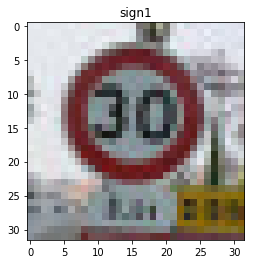

92.4%	Speed limit (30km/h)	Occurences in Training Set = 1980
3.8%	Speed limit (50km/h)	Occurences in Training Set = 2010
2.4%	Wild animals crossing	Occurences in Training Set = 690
0.7%	Double curve        	Occurences in Training Set = 270
0.4%	Stop                	Occurences in Training Set = 690


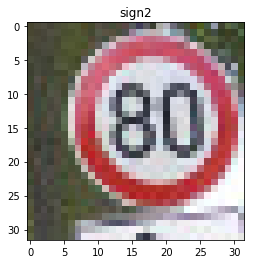

77.4%	Speed limit (80km/h)	Occurences in Training Set = 1650
19.5%	Speed limit (30km/h)	Occurences in Training Set = 1980
1.2%	Speed limit (20km/h)	Occurences in Training Set = 180
0.8%	Speed limit (50km/h)	Occurences in Training Set = 2010
0.4%	Speed limit (120km/h)	Occurences in Training Set = 1260


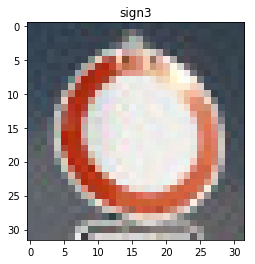

100.0%	No vehicles         	Occurences in Training Set = 540
0.0%	No passing          	Occurences in Training Set = 1320
0.0%	Speed limit (50km/h)	Occurences in Training Set = 2010
0.0%	Speed limit (70km/h)	Occurences in Training Set = 1770
0.0%	Bumpy road          	Occurences in Training Set = 330


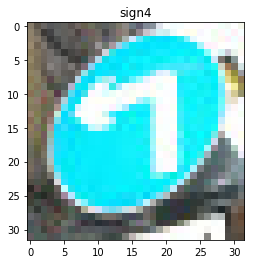

81.8%	Roundabout mandatory	Occurences in Training Set = 300
17.9%	Keep right          	Occurences in Training Set = 1860
0.2%	Go straight or left 	Occurences in Training Set = 180
0.0%	Turn left ahead     	Occurences in Training Set = 360
0.0%	End of no passing   	Occurences in Training Set = 210


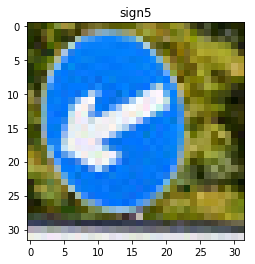

97.0%	Roundabout mandatory	Occurences in Training Set = 300
3.0%	Turn right ahead    	Occurences in Training Set = 599
0.0%	Turn left ahead     	Occurences in Training Set = 360
0.0%	Go straight or left 	Occurences in Training Set = 180
0.0%	Keep left           	Occurences in Training Set = 270


In [238]:

for idx in range(len(test_signs_norm)):
    
    showImage(test_signs, idx, 'sign'+str(idx+1) )
    
    for predictionNum in range(5):
        probability = top5prob_values[idx][predictionNum]
        yClass = top5prob_classes[idx][predictionNum]
        label = signNames[yClass]
        nTraining = int(nHist[0][yClass])
        # Identify number of occurences in training set
        print('{:3.1f}%\t{:20s}\tOccurences in Training Set = {}'.format(probability*100,label,nTraining))
    



### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


INFO:tensorflow:Restoring parameters from ./trafficSignCNN


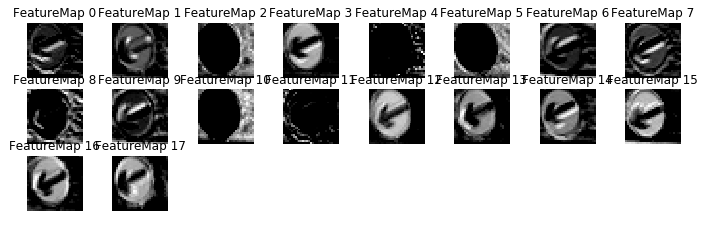

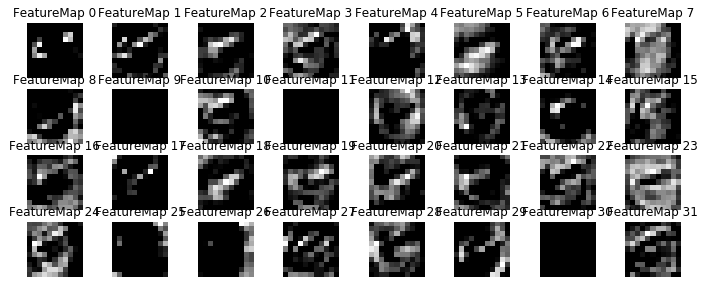

In [270]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, color="gray", activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    image_input = preprocessImages(image_input)
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input, dropout_keep_prob: 1.0})
    featuremaps = activation.shape[3]
    fig = plt.figure(plt_num, figsize=(12,12))
    for featuremap in range(featuremaps):
        ax = plt.subplot(10,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap=color)
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap=color)
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap=color)
        ax.axis('off')
    display(fig)
    plt.close()

            
image_input = test_signs[4:5,:,:,:]



with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # Restore trained weights
    saver.restore(sess, './trafficSignCNN')
    
    outputFeatureMap(image_input, Layer1_output)
    
    outputFeatureMap(image_input, Layer2_output)
    
    #outputFeatureMap(image_input, Layer3_output)

In [277]:
### Define functions for viewing color channels individually

def redOnly(image_input):
    # Red image
    red_img = image_input.copy()
    red_img[0,:,:,1:3] = 0
    return red_img

def greenOnly(image_input):
    # Red image
    green_img = image_input.copy()
    green_img[0,:,:,[0,2]] = 0
    return green_img

def blueOnly(image_input):
    # Red image
    blue_img = image_input.copy()
    blue_img[0,:,:,0:2] = 0
    return blue_img

def showColorChannels(image_input):
    # Show test image and each of its color channels
    fig = plt.figure(figsize=(12,12))
    plt.subplot(1,4,1)
    plt.imshow(image_input[0])
    
    plt.subplot(1,4,2)
    plt.imshow(redOnly(image_input)[0],cmap="Reds")

    plt.subplot(1,4,3)
    plt.imshow(greenOnly(image_input)[0],cmap="Greens")

    plt.subplot(1,4,4)
    plt.imshow(blueOnly(image_input)[0],cmap="Blues")
    display(fig); plt.close()
    

def CompareColorChannelMap(images):
    

    # First Layer
    for img in images:
        outputFeatureMap(redOnly(img), Layer1_output, color="Reds")
    #outputFeatureMap(redOnly(img2), Layer1_output, color="Reds")

    for img in images:
        outputFeatureMap(greenOnly(img), Layer1_output, color="Greens")
    #outputFeatureMap(greenOnly(img2), Layer1_output, color="Greens")

    for img in images:
        outputFeatureMap(blueOnly(img), Layer1_output, color="Blues")
    #outputFeatureMap(blueOnly(img2), Layer1_output, color="Blues")

    # Second Layer
    for img in images:
        outputFeatureMap(redOnly(img), Layer2_output, color="Reds")
    #outputFeatureMap(redOnly(img2), Layer2_output, color="Reds")

    for img in images:
        outputFeatureMap(greenOnly(img), Layer2_output, color="Greens")
    #outputFeatureMap(greenOnly(img2), Layer2_output, color="Greens")

    for img in images:
        outputFeatureMap(blueOnly(img), Layer2_output, color="Blues")
    #outputFeatureMap(blueOnly(img2), Layer2_output, color="Blues")

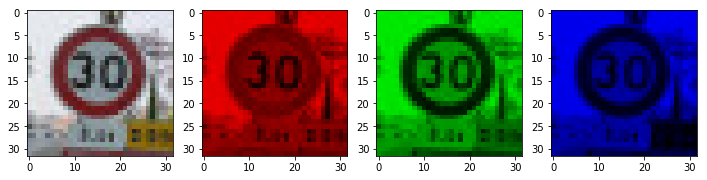

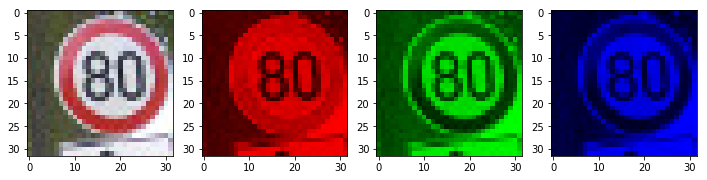

INFO:tensorflow:Restoring parameters from ./trafficSignCNN


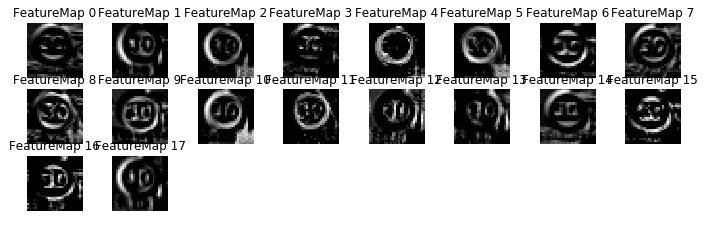

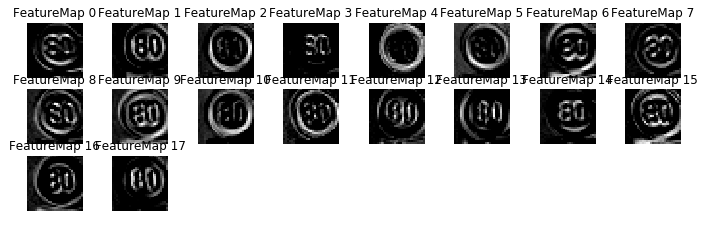

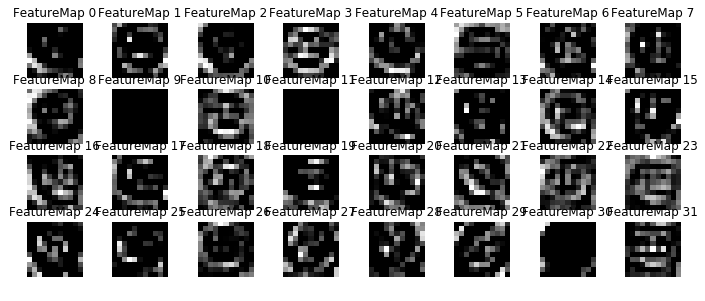

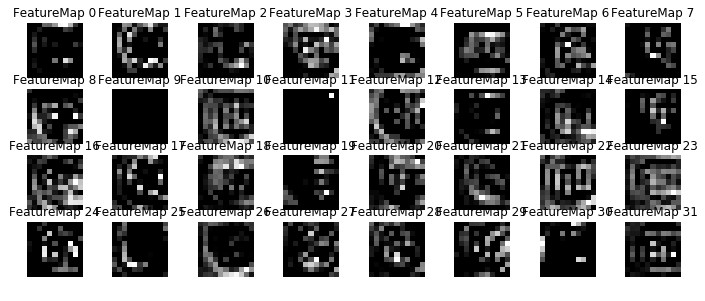

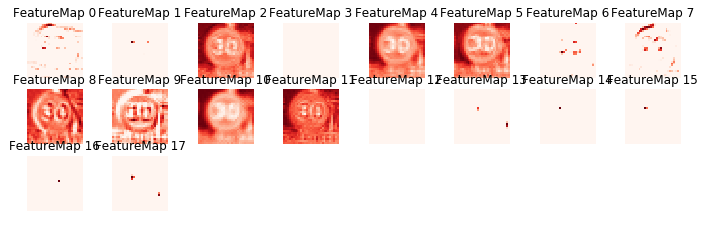

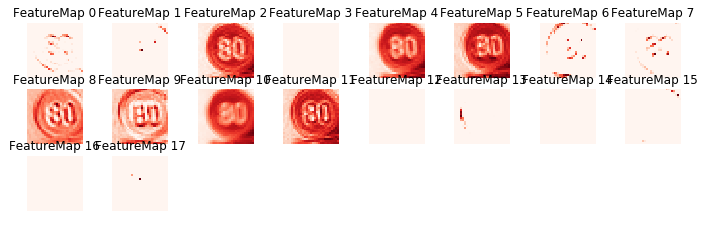

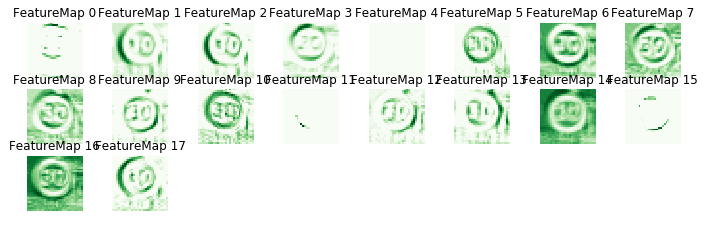

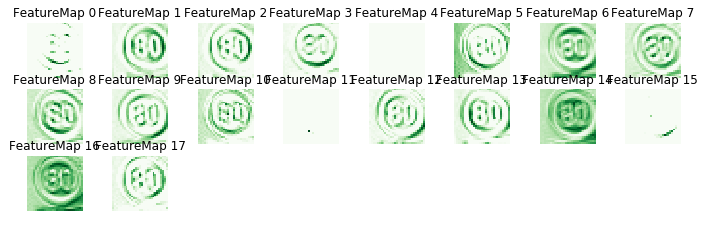

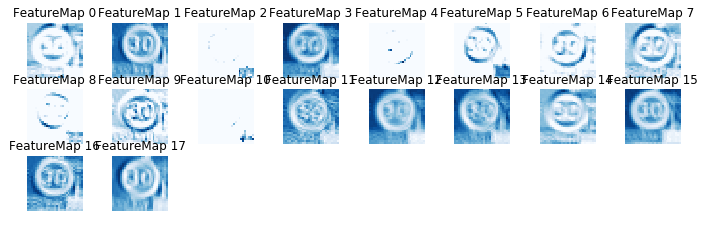

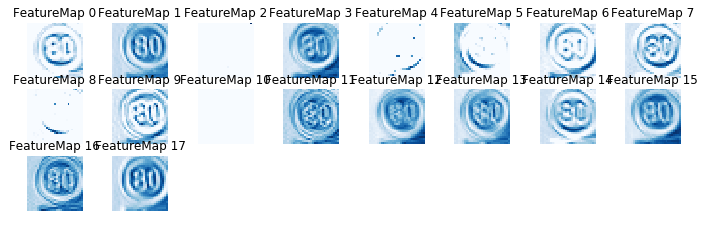

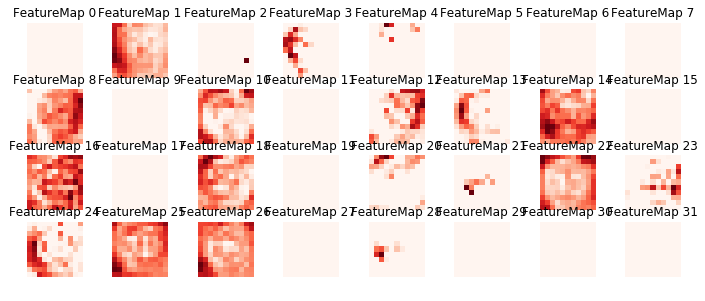

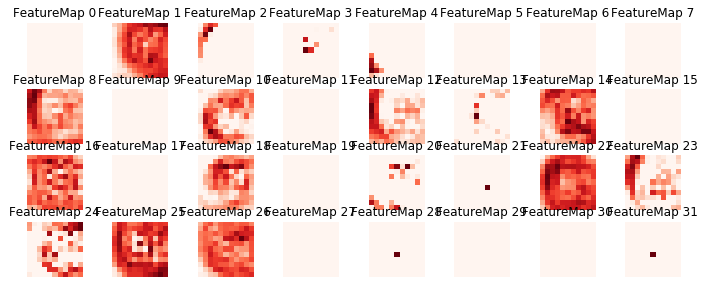

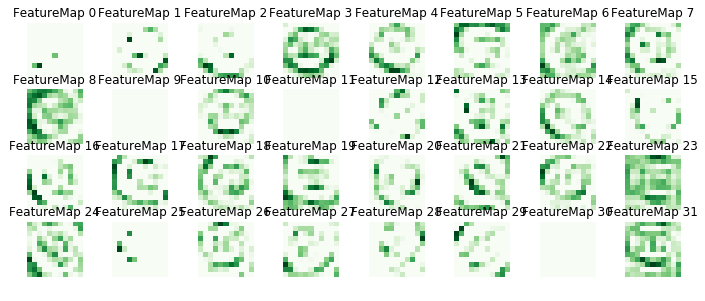

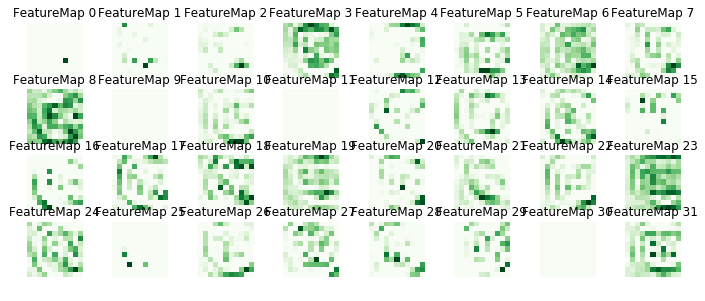

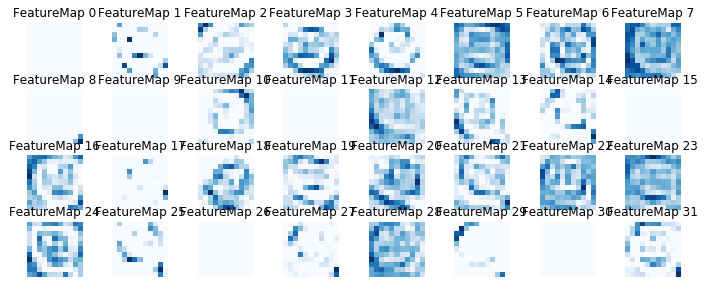

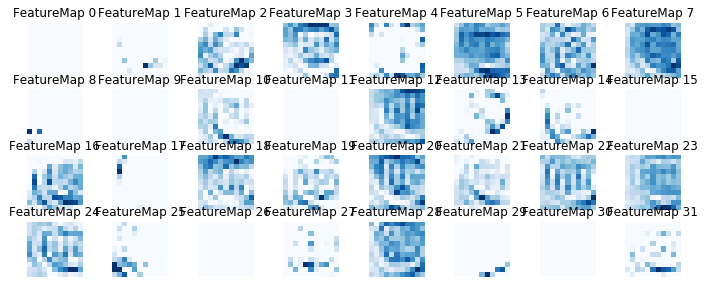

In [278]:
### Investigate affect of color channels on feature maps

# Compare 30km/h and 80km/h test images

sign30kmh = test_signs[0:1,:,:,:]
sign80kmh = test_signs[1:2,:,:,:]

showColorChannels(sign30kmh)
showColorChannels(sign80kmh)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # Restore trained weights
    saver.restore(sess, './trafficSignCNN')
    
    # First Layer
    outputFeatureMap(sign30kmh, Layer1_output)
    outputFeatureMap(sign80kmh, Layer1_output)

    # Second Layer
    outputFeatureMap(sign30kmh, Layer2_output)
    outputFeatureMap(sign80kmh, Layer2_output)
    
    
    CompareColorChannelMap([sign30kmh, sign80kmh])


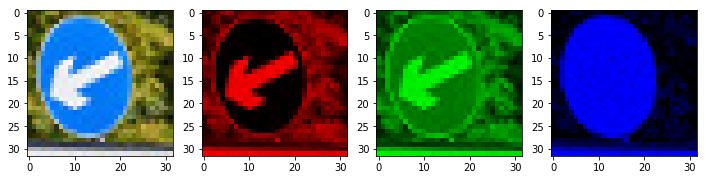

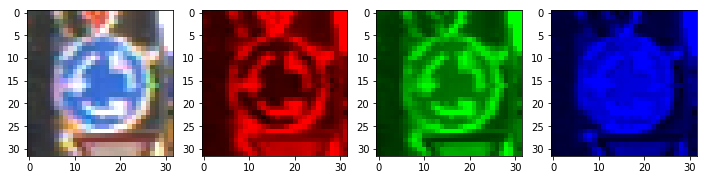

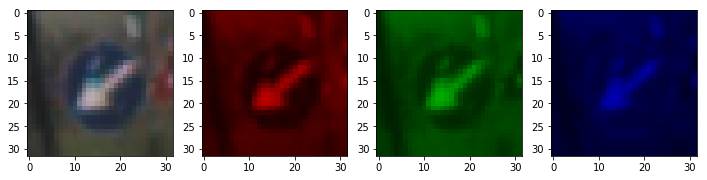

INFO:tensorflow:Restoring parameters from ./trafficSignCNN


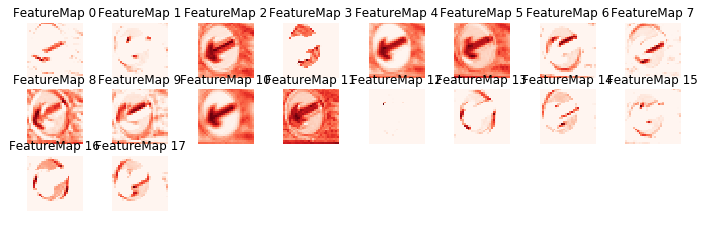

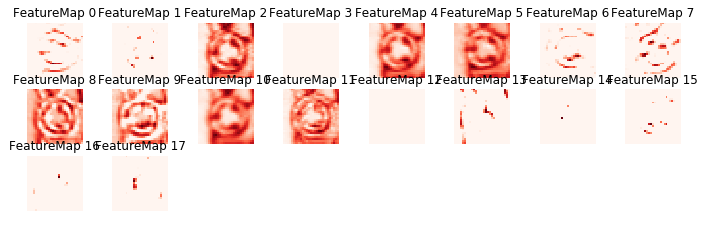

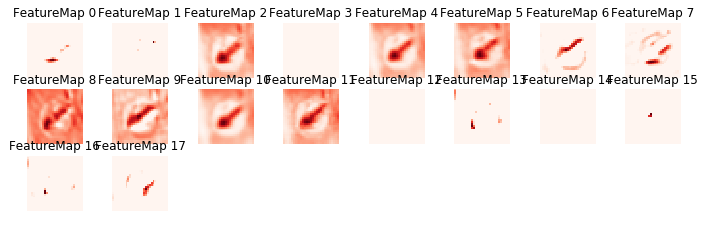

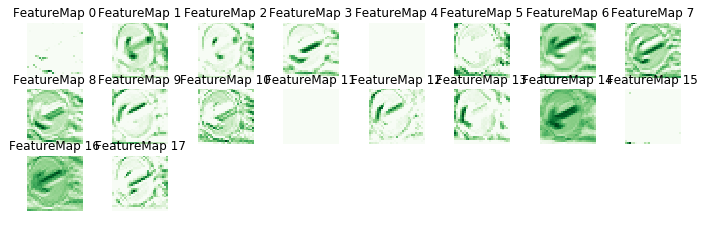

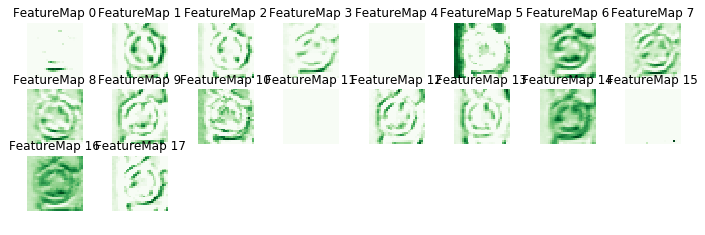

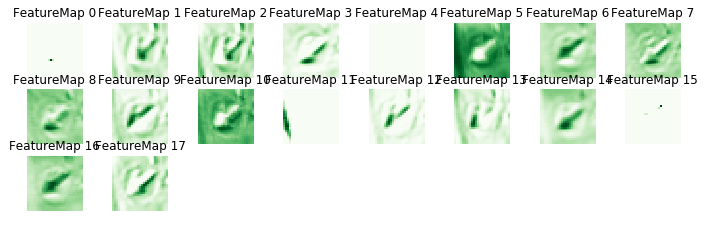

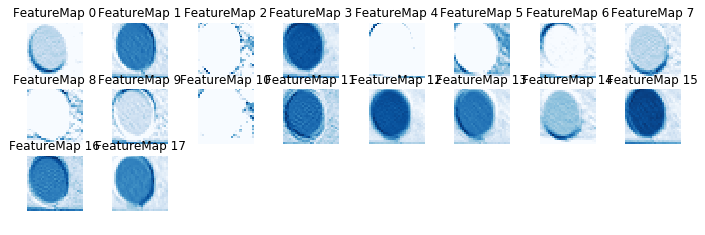

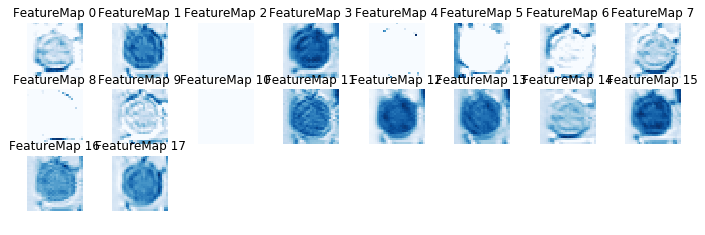

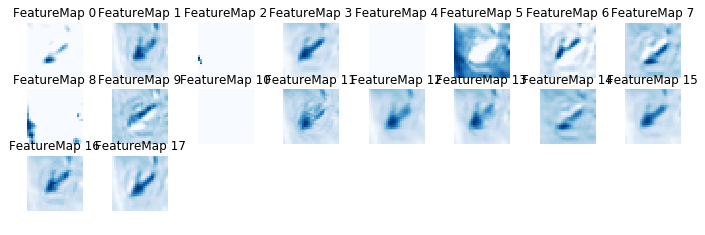

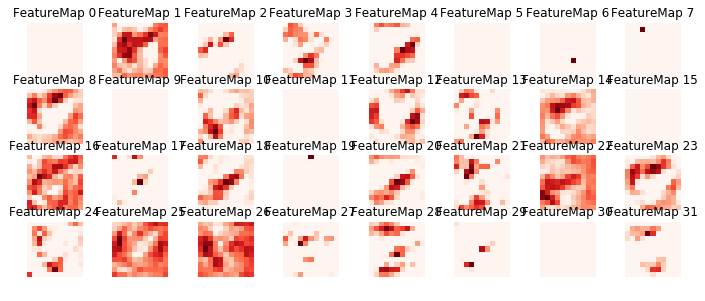

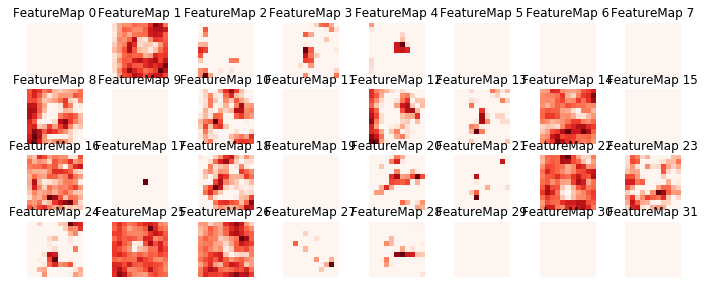

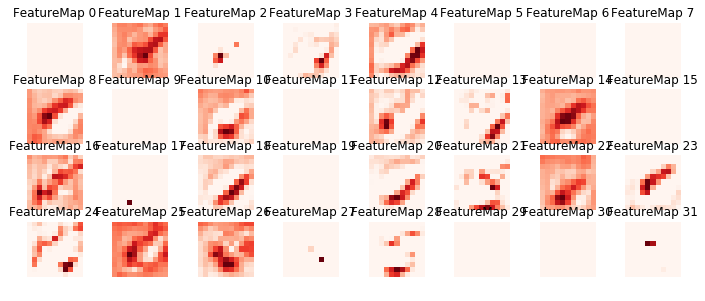

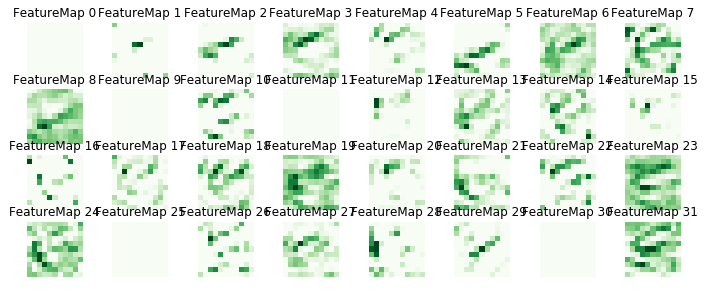

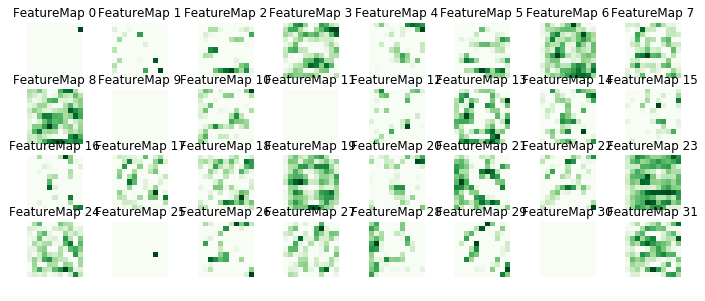

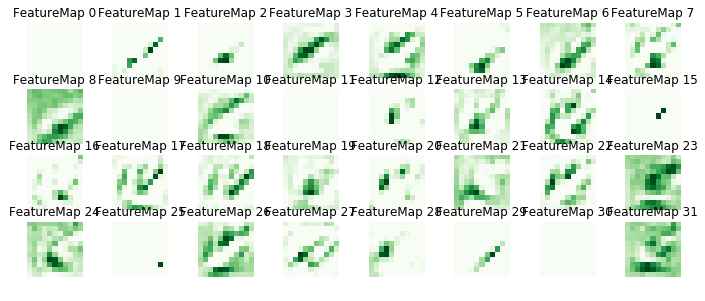

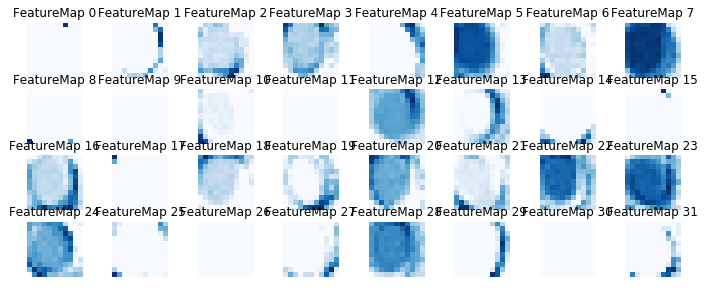

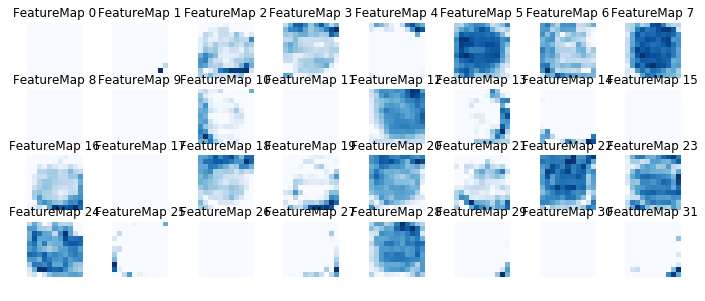

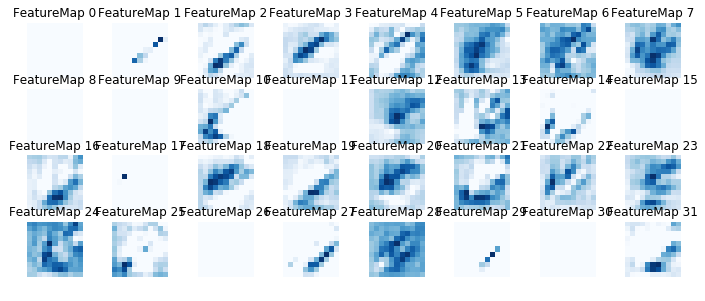

In [280]:
### Investigate a test image that was matched with the incorrect label


testImg_Idx = 4

testImg = test_signs[testImg_Idx:testImg_Idx+1,:,:,:]


matchedClass = top5prob_classes[testImg_Idx][0]
matchedIdx = uniqueIndices[matchedClass]
correctClass = imgLabels[testImg_Idx]
correctIdx = uniqueIndices[correctClass]

matchedImg = X_train[matchedIdx:matchedIdx+1,:,:,:]
correctImg = X_train[correctIdx:correctIdx+1,:,:,:]

showColorChannels(testImg)
showColorChannels(matchedImg)
showColorChannels(correctImg)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # Restore trained weights
    saver.restore(sess, './trafficSignCNN')
    
    CompareColorChannelMap([testImg, matchedImg, correctImg])